In [6]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import librosa
from IPython.display import Audio

In [7]:
# !wget -r https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/4R8jAFyoX4Edzg

In [8]:
# !mkdir data
# !unzip -u getfile.dokpub.com/yandex/get/https:/disk.yandex.ru/d/4R8jAFyoX4Edzg -d data

Данные:
https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist

In [9]:
def get_data(digit=0,person=1,index=0,target_sr=16000):
    if person < 10:
        file = f"data/voice_ger/0{person}/{digit}_0{person}_{index}.wav"
    else:
        file = f"data/voice_ger/{person}/{digit}_{person}_{index}.wav"

    data, sr = librosa.load(file)#sr=22050
    #down sampling to 16000Hz
    down_d = librosa.resample(data, orig_sr=sr, target_sr=target_sr)
    return down_d, target_sr

In [10]:
person=2

In [11]:
def play_audio(digit=0, person=person, index=0):
    data,sr = get_data(digit=digit, person=person, index=index)

    plt.figure(figsize=(5,2))
    plt.plot(np.linspace(0,len(data)/sr,len(data)),data)
    plt.title(f"digit: {digit}, person: {person}, index{index}")
    plt.xlabel(f"[Sec]  ({len(data)} samples)")
    plt.show()
    return display(Audio(data=data, rate=sr))


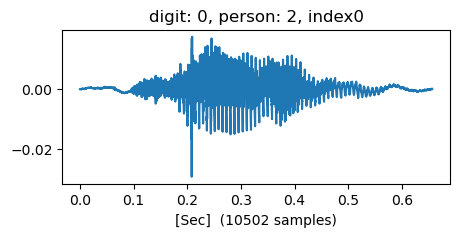

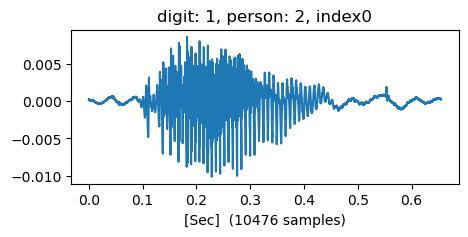

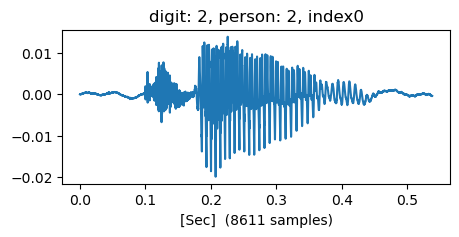

In [12]:
for i in range(0, 3):
    play_audio(digit=i)

In [13]:
#Modified get_data()
def get_data_m(digit=0,person=person,index=0,target_sr=16000):
    if person < 10:
        file = f"data/voice_ger/0{person}/{digit}_0{person}_{index}.wav"
    else:
        file = f"data/voice_ger/{person}/{digit}_{person}_{index}.wav"

    data, sr = librosa.load(file)#sr=22050
    #down sampling to 8000Hz
    down_d = librosa.resample(data, orig_sr=sr, target_sr=target_sr)
    #fixed length of all data to 12000 samples
    fix_len_d = librosa.util.fix_length(down_d, size=12000)
    return fix_len_d, target_sr

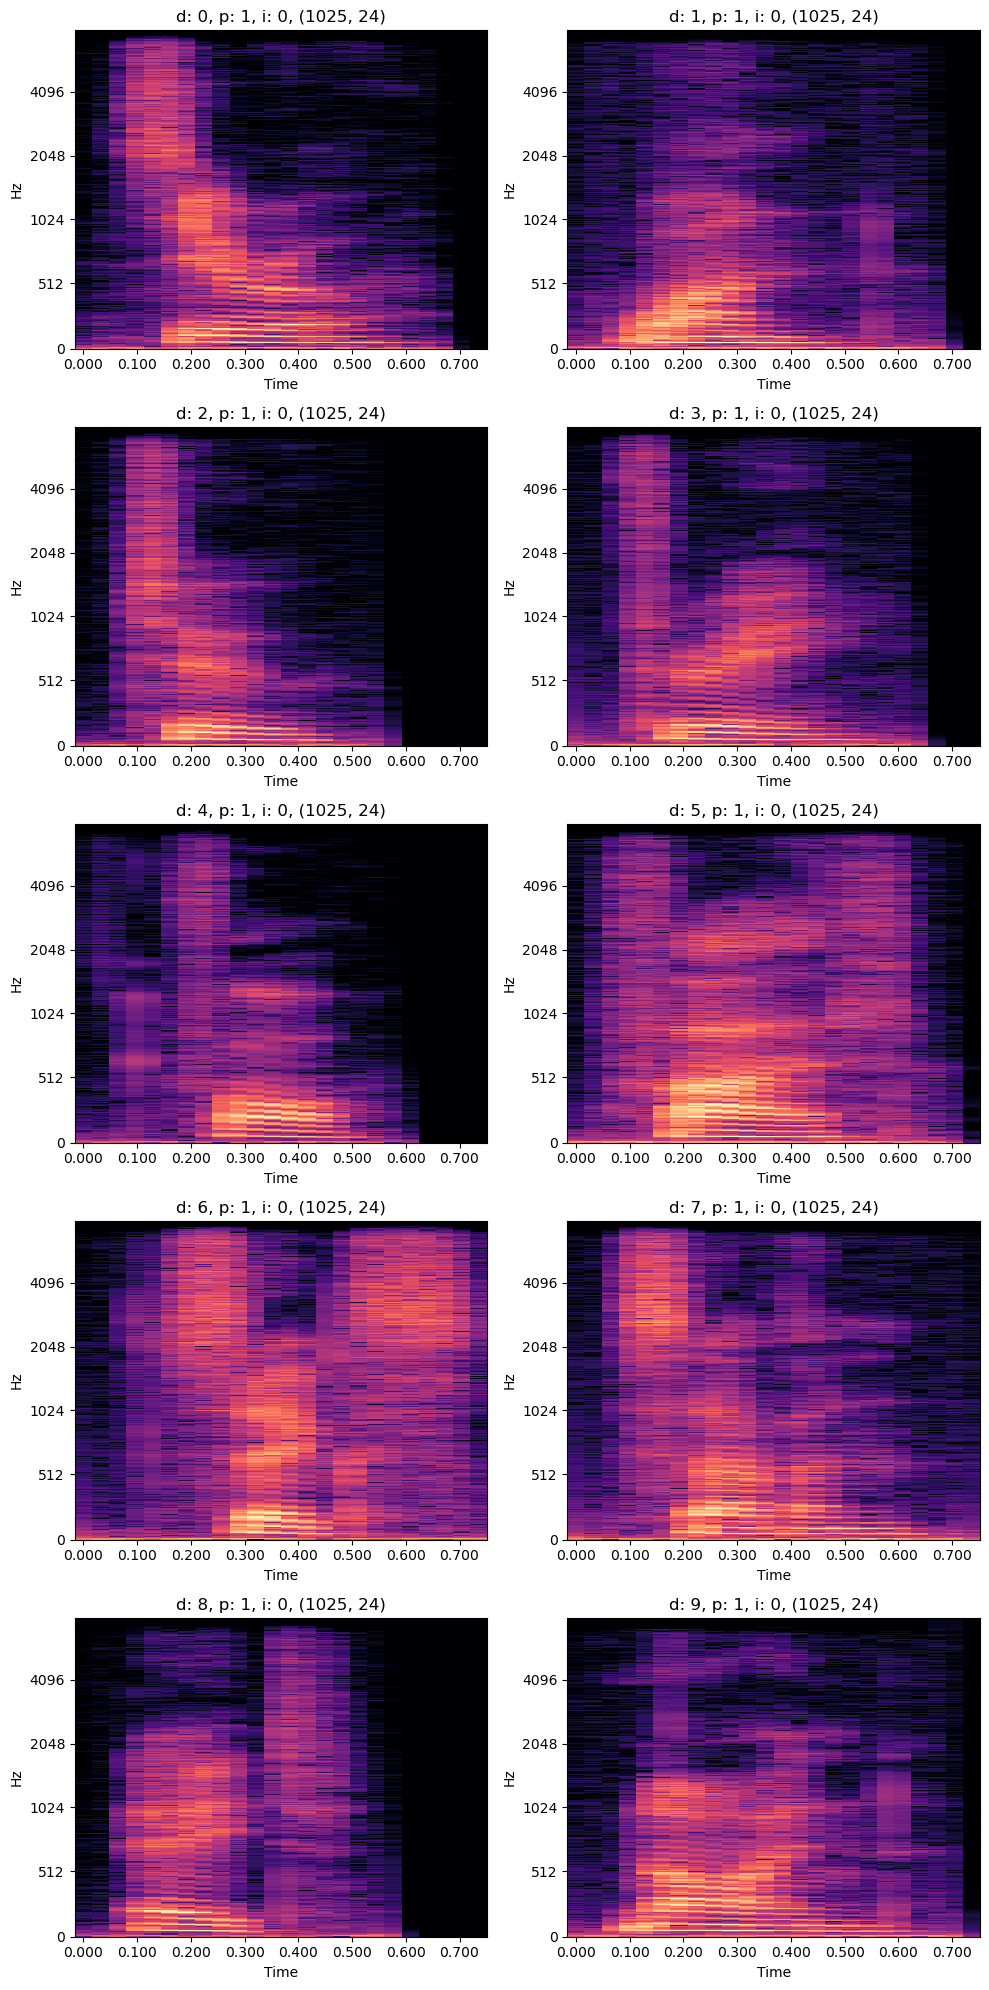

In [14]:
#Spectrogram
def spec_data(digit=0,person=person,index=0):
    data, sr = get_data_m(digit=digit,person=person,index=index)
    data = np.abs(librosa.stft(data))
    return data, sr

fig, ax = plt.subplots(5,2,figsize=(10,20))
for i, ax in enumerate(ax.flat):
    data, sr = spec_data(digit=i,person=2,index=0)
    librosa.display.specshow(librosa.amplitude_to_db(data, ref=np.max), sr=sr,
                              y_axis='mel', x_axis='time', ax=ax)
    ax.set_title(f"d: {i}, p: {1}, i: {0}, {data.shape}")

plt.tight_layout()
plt.show()

Периодограмма временного ряда — это функция от частоты, которая показывает оценку спектральной плотности сигнала.

С помощью анализа периодограммы ряда можно установить присутствие или отсутствие той или иной составляющей, а также её характер и относительную величину.

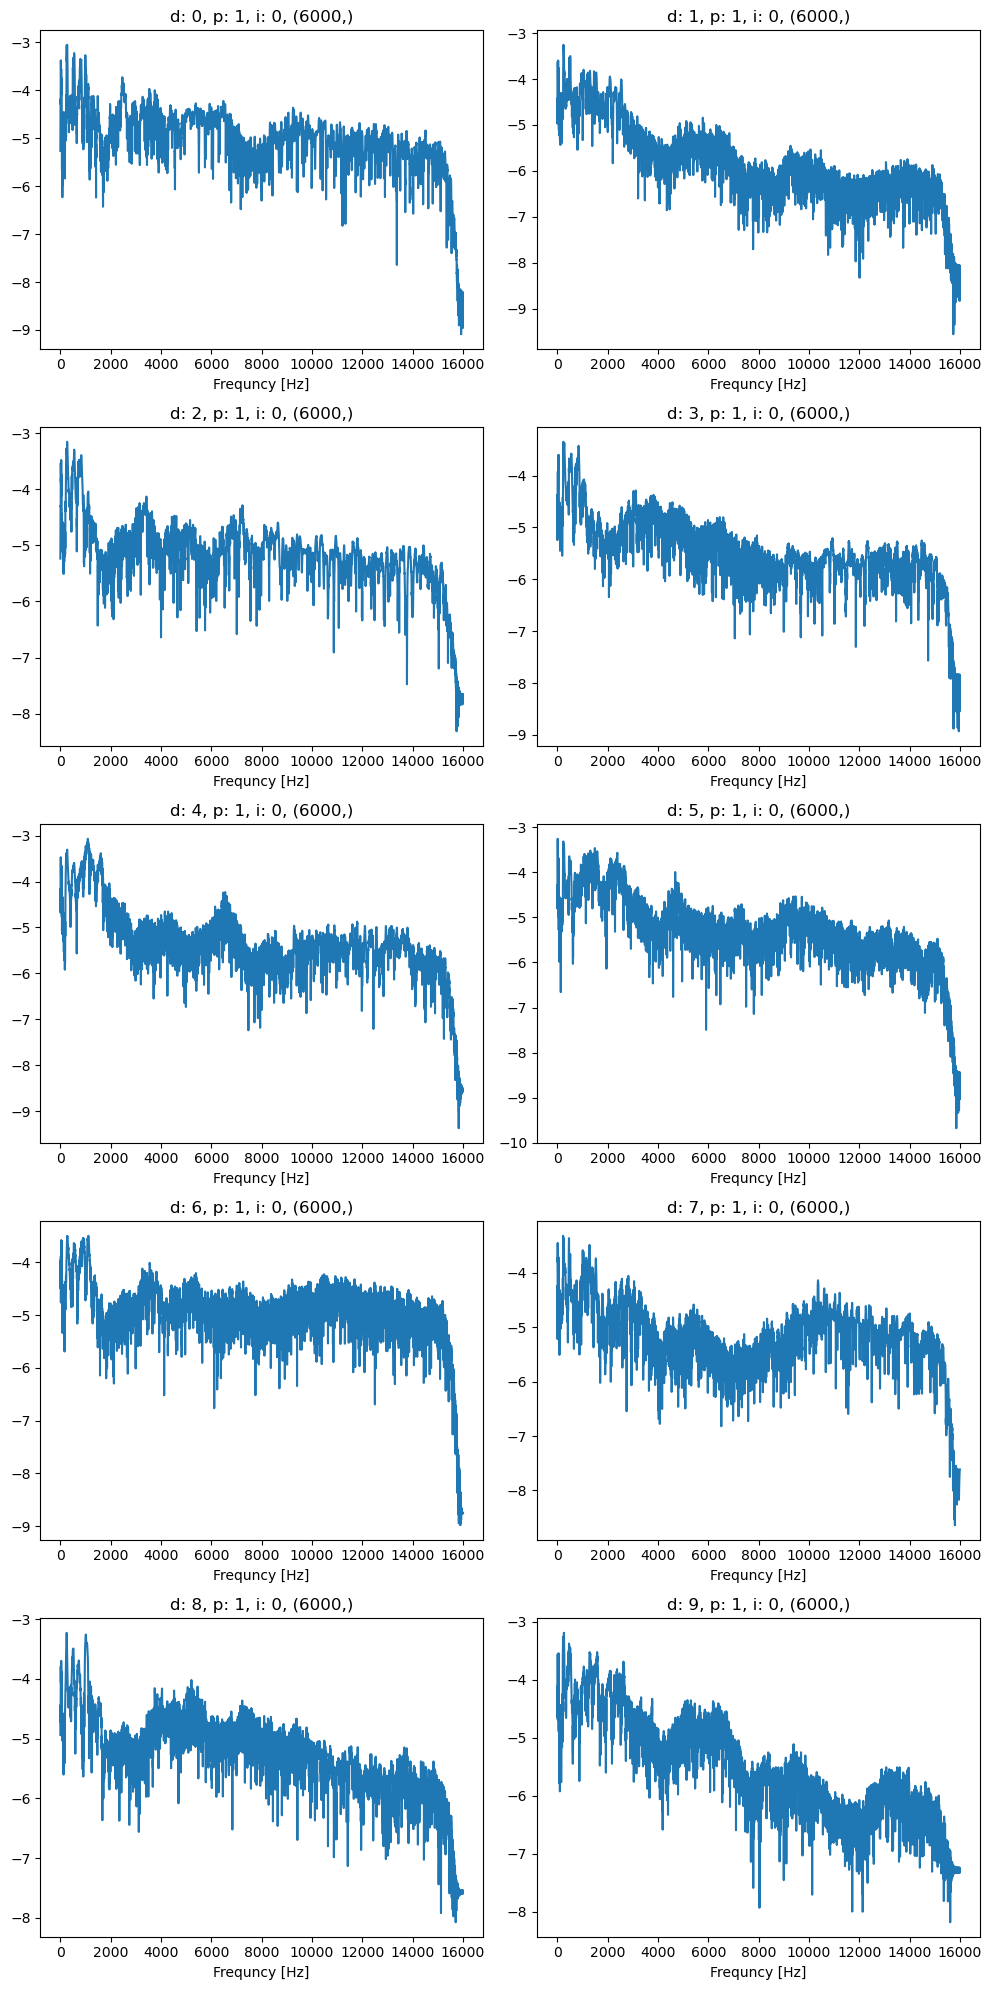

In [15]:
#Periodogram
def peri_data(digit=0, person=person, index=0):
    data,sr = get_data_m(digit=digit, person=person, index=index)
    fft = np.fft.fft(data, len(data))
    peri = 2*np.abs(fft)[:len(data)//2]/len(data)
    return peri,sr

fig, ax = plt.subplots(5,2,figsize=(10,20))
for i, ax in enumerate(ax.flat):
    data,sr = peri_data(digit=i,person=2,index=0)
    ax.plot(np.linspace(0, sr, len(data)) , np.log10(data))
    ax.set_xlabel('Frequncy [Hz]')
    ax.set_title(f"d: {i}, p: {1}, i: {0}, {data.shape}")

plt.tight_layout()
plt.show()

## Model

In [80]:
#Modified get_data()
def get_data_m(digit=0,person=person,index=0,target_sr=16000):
    if person < 10:
        file = f"data/voice_ger/0{person}/{digit}_0{person}_{index}.wav"
    else:
        file = f"data/voice_ger/{person}/{digit}_{person}_{index}.wav"

    data, sr = librosa.load(file)#sr=22050
    #down sampling to 8000Hz
    down_d = librosa.resample(data, orig_sr=sr, target_sr=target_sr)
    #fixed length of all data to 12000 samples
    fix_len_d = librosa.util.fix_length(down_d, size=12000)
    return fix_len_d, target_sr

In [81]:
def read_data(digit=0, person=2, index=0):
    data_per = get_data_m(digit=digit, person=person, index=index)
    return data_per


In [82]:
df_m = pd.DataFrame()
df_f = pd.DataFrame()

In [83]:
for i in range(0,50):
    df_m[i] = pd.DataFrame(read_data(index=i, person=2)[0])

In [84]:
for i in range(0,50):
    df_f[i] = pd.DataFrame(read_data(index=i, person=12)[0])

In [85]:
df_m = df_m.add_suffix('_m')
df_f = df_f.add_suffix('_f')

In [86]:
df = pd.concat([df_m, df_f], axis =1)

In [87]:
target = [0 if x<50 else 1 for x in range(0,100)]

In [88]:
df.head()

,0_m,1_m,2_m,3_m,4_m,5_m,6_m,7_m,8_m,9_m,...,40_f,41_f,42_f,43_f,44_f,45_f,46_f,47_f,48_f,49_f
0,0.000013,-0.000205,0.000262,-0.000077,0.000145,0.000254,0.000142,-0.000075,-0.000562,-0.000088,...,-0.000131,0.000118,-0.000300,-0.000250,-0.000064,0.000253,0.000127,0.000008,0.000477,-0.000290
1,0.000024,-0.000378,0.000426,-0.000146,0.000217,0.000410,0.000218,-0.000175,-0.000956,-0.000113,...,-0.000278,0.000179,-0.000502,-0.000415,-0.000154,0.000448,0.000196,0.000014,0.000794,-0.000501
2,-0.000008,-0.000336,0.000385,-0.000135,0.000203,0.000364,0.000195,-0.000156,-0.000825,-0.000088,...,-0.000265,0.000151,-0.000420,-0.000412,-0.000078,0.000401,0.000130,-0.000017,0.000700,-0.000415
3,0.000047,-0.000368,0.000402,-0.000141,0.000189,0.000384,0.000219,-0.000083,-0.000887,-0.000105,...,-0.000300,0.000159,-0.000499,-0.000411,-0.000106,0.000430,0.000113,-0.000031,0.000755,-0.000480
4,0.000046,-0.000362,0.000409,-0.000134,0.000181,0.000379,0.000196,-0.000106,-0.000877,-0.000096,...,-0.000279,0.000129,-0.000510,-0.000374,-0.000128,0.000421,0.000104,-0.000104,0.000765,-0.000490


In [89]:
np.unique(target, return_counts= True)

(array([0, 1]), array([50, 50]))

## Модель без извлечения признаков
Давайте обучим модель БЕЗ извлечения признаков

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [91]:
X = df.T.values

In [92]:
X.shape

(100, 12000)

In [93]:
Y = np.array(target)[None].T

In [94]:
Y.shape

(100, 1)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=.3,
                                                shuffle=True,random_state=42)
print(X_train.shape,Y_train.shape, X_test.shape,Y_test.shape)

(70, 12000) (70, 1) (30, 12000) (30, 1)


In [102]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)
print("Accuracy on training set is : {:.2f}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {:.2f}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

Accuracy on training set is : 0.99
Accuracy on test set is : 0.73
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.86      0.46      0.60        13

    accuracy                           0.73        30
   macro avg       0.78      0.70      0.70        30
weighted avg       0.77      0.73      0.71        30



/Users/stureiko/miniforge3/envs/otus/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_test_pred)

array([[16,  1],
       [ 3, 10]])

## Модель на вейвлетах
Давайте теперь обучим модель на основе выделенных признаков

In [47]:
import pywt

In [48]:
for family in pywt.families():
    print("%s family: " % family + ', '.join(pywt.wavelist(family)))

haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

In [50]:
waveletname = 'bior1.3'  #'rbio3.1'

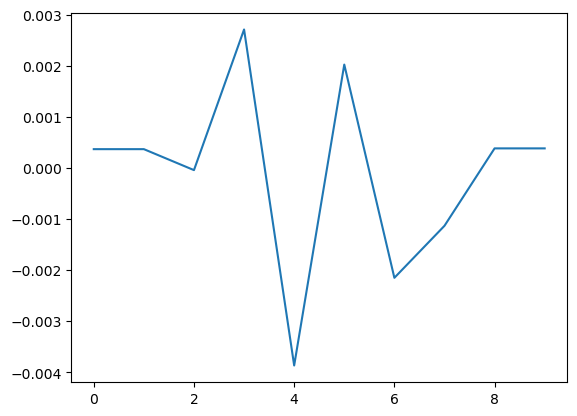

In [51]:
plt.plot(pywt.wavedec(df['0_m'], waveletname)[0]);

In [52]:
df_m_w = pd.DataFrame()
df_f_w = pd.DataFrame()

In [53]:
for i in range(len(df_m.T)):
    df_m_2D = pd.DataFrame(pywt.wavedec(df_m.iloc[:,i], waveletname)).dropna(axis=1).T
    df_m_w[i] = pd.melt(df_m_2D)['value']

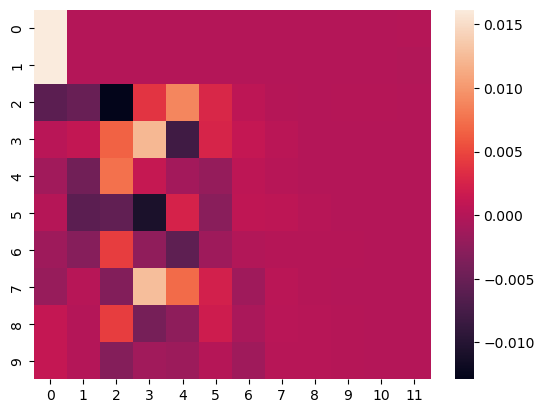

In [55]:
# Фич больше, временные ряды короче - 10 отсчетов - это образ нашего сигнала
import seaborn as sns

sns.heatmap(df_m_2D);

давайте превратим образ в вектор для каждого экземпляра данных (аналогично flatten слою в CNN)

In [56]:
for i in range(len(df_f.T)):
    df_f_2D = pd.DataFrame(pywt.wavedec(df_m.iloc[:,i], waveletname)).dropna(axis=1)
    df_f_w[i] = pd.melt(df_f_2D)['value']

In [57]:
df_w = pd.concat([df_m_w, df_f_w], axis =1)

In [58]:
X=df_w.T.values

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3,
                                                 shuffle=True,random_state=42)
print(X_train.shape,Y_train.shape, X_test.shape,Y_test.shape)

(70, 120) (70, 1) (30, 120) (30, 1)


In [75]:
clf = RandomForestClassifier(n_estimators=2)
clf.fit(X_train, Y_train.ravel())
print("Accuracy on training set is : {:.2f}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {:.2f}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

Accuracy on training set is : 0.99
Accuracy on test set is : 0.97
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Вывод: при однотипных (и даже более худших) характеристиках классификатора, использование вейвлет-преобразование позволяет повысить точностные характеристики, выделив наиболее существенные признаки из набора данных

In [61]:
confusion_matrix(Y_test, Y_test_pred)

array([[17,  0],
       [ 0, 13]])